In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as rc
import copy
%matplotlib inline

In [33]:
plt.rc('font', family = 'AppleGothic')

In [34]:
text_foreigner = pd.read_csv("/Users/jaeyoungcho/Desktop/2020빅콘테스트 문제데이터(혁신아이디어분야)/02_카드매출데이터(신한카드)/CARD_SPENDING_FOREIGNER.txt",sep = '\t',encoding='CP949')
text_resident = pd.read_csv("/Users/jaeyoungcho/Desktop/2020빅콘테스트 문제데이터(혁신아이디어분야)/02_카드매출데이터(신한카드)/CARD_SPENDING_RESIDENT.txt",sep = '\t',encoding='CP949')
kr_daily = pd.read_csv('/Users/jaeyoungcho/Desktop/kr_daily.csv',sep = ',',encoding='CP949')
ind = pd.read_excel("/Users/jaeyoungcho/Desktop/2020빅콘테스트 문제데이터(혁신아이디어분야)/카드소비데이터(신한카드)_데이터정의서.xlsx",sheet_name=2,header=2)

In [35]:
X = []
for i in ind['Unnamed: 1']:
    if type(i) == str:
        X.append(i)
a = []
b = []
for i in X:
    a.append(i[:-4])
    b.append(int(i[-3:-1]))
ind = dict(zip(b,a))

In [36]:
text_foreigner.columns = ['기준일자','구코드','동코드','업종코드','나라','이용건수','이용금액']
text_resident.columns = ['기준일자','구코드','동코드','업종코드','성별','나이코드','이용건수','이용금액']

In [37]:
text_foreigner.drop(['구코드'],axis = 1,inplace = True)
text_foreigner.drop(['동코드'],axis = 1,inplace = True)
text_foreigner.drop(['나라'],axis = 1,inplace = True)

In [38]:
text_resident.drop(['구코드'],axis = 1, inplace = True)
text_resident.drop(['동코드'],axis = 1, inplace = True)
text_resident.drop(['성별'],axis = 1, inplace = True)
text_resident.drop(['나이코드'],axis = 1, inplace = True)

In [39]:
text_All = pd.concat((text_foreigner,text_resident),axis = 0)
text_All.drop(text_All.loc[text_All['기준일자'] == 20200229].index,inplace = True)
text_All.reset_index(drop = True,inplace = True)

In [40]:
text_All['업종코드'].replace(ind, inplace = True)
text_All['기준해'] = pd.Series(map(lambda x : int(str(x)[0:4]),text_All['기준일자']))
text_All['일자'] = pd.Series(map(lambda x : x % 1000, text_All['기준일자']))
text_All['기준월'] = pd.Series(map(lambda x : int(str(x)[4:6]), text_All['기준일자']))

In [41]:
text_All = pd.DataFrame(text_All.groupby(['업종코드','기준해','기준월','일자'])['이용금액','이용건수'].sum())
text_All.reset_index(inplace = True)

/Users/jaeyoungcho/opt/anaconda3/envs/BigContest/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [43]:
text_All

,업종코드,기준해,기준월,일자,이용금액,이용건수
0,가구,2019,2,201,20244.0,94
1,가구,2019,2,202,64324.0,188
2,가구,2019,2,203,10250.0,54
3,가구,2019,2,204,10292.0,38
4,가구,2019,2,205,6192.0,5
...,...,...,...,...,...,...
5504,직물,2020,5,527,106442.0,935
5505,직물,2020,5,528,128062.0,1071
5506,직물,2020,5,529,151093.0,881
5507,직물,2020,5,530,122852.0,1084


In [44]:
industry = []
for i in ind.values():
    industry.append(i)

In [45]:
# 업종별 이용금액이 shape 다른지 확인하고 날짜 확인해서 0값 넣어주기
temp = copy.copy(text_All)
temp = pd.DataFrame(temp.groupby(['업종코드','기준해','기준월','일자'])['이용금액','이용건수'].sum())

/Users/jaeyoungcho/opt/anaconda3/envs/BigContest/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
month = [2,3,4,5]
temp_ind = ['전기','전기']
year = [2019,2020]
mon = [3,3]
date = [17,18]
for i in industry:
    for k in month:
        if temp.loc[i,2019,k].shape != temp.loc[i,2020,k].shape :
            print(i,'\n2019 {}월 shape : {}\n2020 {}월 shape : {}'.format(k,temp.loc[i,2019,k].shape,k,temp.loc[i,2020,k].shape))
            a = text_All.loc[(text_All['업종코드'] == i) & (text_All['기준해']==2019)& (text_All['기준월']==k)]['일자'].tolist()
            b = text_All.loc[(text_All['업종코드'] == i) & (text_All['기준해']==2020)& (text_All['기준월']==k)]['일자'].tolist()
            for j in range(len(b)):
                if b[j] not in a:
                    print(i,2019,k,'월',b[j])
                    temp_ind.append(i)
                    year.append(2019)
                    mon.append(k)
                    date.append(b[j])
            for t in range(len(a)):    
                if a[t] not in b:
                    print(i,2020,k,'월',a[t])
                    temp_ind.append(i)
                    year.append(2020)
                    mon.append(k)
                    date.append(a[t])

전기 
2019 2월 shape : (25, 2)
2020 2월 shape : (28, 2)
전기 2019 2 월 205
전기 2019 2 월 217
전기 2019 2 월 224
전기 
2019 4월 shape : (30, 2)
2020 4월 shape : (29, 2)
전기 2020 4 월 405
전기 
2019 5월 shape : (30, 2)
2020 5월 shape : (28, 2)
전기 2019 5 월 512
전기 2020 5 월 503
전기 2020 5 월 517
전기 2020 5 월 524
주방용구 
2019 2월 shape : (27, 2)
2020 2월 shape : (28, 2)
주방용구 2019 2 월 205


In [47]:
# 존재하지 않는 데이터에 0 값 추가해주기
pay = [0] * 11
cnt = [0] * 11
plus =  pd.DataFrame({'업종코드': temp_ind,'기준해':year,'기준월': mon,'일자':date,'이용금액':pay,'이용건수':cnt})
text_All = pd.concat((text_All,plus),axis = 0)
text_All.reset_index(drop=True)

,업종코드,기준해,기준월,일자,이용금액,이용건수
0,가구,2019,2,201,20244.0,94
1,가구,2019,2,202,64324.0,188
2,가구,2019,2,203,10250.0,54
3,가구,2019,2,204,10292.0,38
4,가구,2019,2,205,6192.0,5
...,...,...,...,...,...,...
5515,전기,2019,5,512,0.0,0
5516,전기,2020,5,503,0.0,0
5517,전기,2020,5,517,0.0,0
5518,전기,2020,5,524,0.0,0


In [61]:
# 값 추가 후 shape 재확인
for i in industry:
    a = text_All.loc[(text_All['업종코드'] == i) & (text_All['기준해'] == 2019)]['이용금액'].tolist()
    b = text_All.loc[(text_All['업종코드'] == i) & (text_All['기준해'] == 2020)]['이용금액'].tolist()
    if len(a) != len(b):
        print(i)
text_All.reset_index(drop=True, inplace = True)

In [62]:
kr_daily['일자'] = pd.Series(map(lambda x : int(str(x)[-3:]),kr_daily['date']))
kr_daily.drop(['date'] , axis = 1)

,confirmed,death,released,tested,negative,일자
0,1,0,0,1,0,121
1,1,0,0,1,0,122
2,1,0,0,1,0,123
3,2,0,0,2,0,124
4,2,0,0,2,0,125
...,...,...,...,...,...,...
217,17945,310,14286,1825837,1757530,825
218,18265,312,14368,1849506,1778446,826
219,18706,313,14461,1869579,1798832,827
220,19077,316,14551,1887717,1817929,828


In [63]:
text_2019 = text_All.loc[text_All['기준해'] == 2019]
text_2020 = text_All.loc[text_All['기준해'] == 2020]
text_2019.reset_index(drop=True,inplace = True)
text_2020.reset_index(drop=True,inplace = True)

In [64]:
text_2019

,업종코드,기준해,기준월,일자,이용금액,이용건수
0,가구,2019,2,201,20244.0,94
1,가구,2019,2,202,64324.0,188
2,가구,2019,2,203,10250.0,54
3,가구,2019,2,204,10292.0,38
4,가구,2019,2,205,6192.0,5
...,...,...,...,...,...,...
2755,전기,2019,2,205,0.0,0
2756,전기,2019,2,217,0.0,0
2757,전기,2019,2,224,0.0,0
2758,전기,2019,5,512,0.0,0


In [65]:
text_2020

,업종코드,기준해,기준월,일자,이용금액,이용건수
0,가구,2020,2,201,121417.0,187
1,가구,2020,2,202,84588.0,85
2,가구,2020,2,203,67909.0,107
3,가구,2020,2,204,37852.0,46
4,가구,2020,2,205,65387.0,116
...,...,...,...,...,...,...
2755,전기,2020,3,18,0.0,0
2756,전기,2020,4,405,0.0,0
2757,전기,2020,5,503,0.0,0
2758,전기,2020,5,517,0.0,0


In [66]:
main = pd.merge(text_2019,text_2020,on = ('일자','업종코드'))
main = pd.merge(main,kr_daily,on='일자')

In [67]:
main

,업종코드,기준해_x,기준월_x,일자,이용금액_x,이용건수_x,기준해_y,기준월_y,이용금액_y,이용건수_y,date,confirmed,death,released,tested,negative
0,가구,2019,2,201,20244.0,94,2020,2,121417.0,187,20200201,12,0,0,383,289
1,가전,2019,2,201,242038.0,1284,2020,2,287893.0,698,20200201,12,0,0,383,289
2,광학제품,2019,2,201,45594.0,1244,2020,2,96571.0,775,20200201,12,0,0,383,289
3,레저업소,2019,2,201,556821.0,24836,2020,2,534261.0,30877,20200201,12,0,0,383,289
4,레저용품,2019,2,201,925726.0,10223,2020,2,987175.0,12267,20200201,12,0,0,383,289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2753,자동차정비,2019,5,531,497058.0,15308,2020,5,93888.0,8866,20200531,11468,270,10405,910822,876060
2754,자동차판매,2019,5,531,138258.0,223,2020,5,58316.0,62,20200531,11468,270,10405,910822,876060
2755,전기,2019,5,531,3138.0,22,2020,5,482.0,10,20200531,11468,270,10405,910822,876060
2756,주방용구,2019,5,531,80730.0,462,2020,5,30701.0,467,20200531,11468,270,10405,910822,876060


In [68]:
main.drop(['기준해_x','기준월_x','기준해_y','기준월_y','date'],axis = 1, inplace = True)
main['이용금액 차이'] = pd.Series(main['이용금액_x'] - main['이용금액_y'])
main['이용건수 차이'] = pd.Series(main['이용건수_x'] - main['이용건수_y'])
main.drop(['이용금액_x','이용금액_y','이용건수_x','이용건수_y'],axis = 1, inplace = True)

In [69]:
main

,업종코드,일자,confirmed,death,released,tested,negative,이용금액 차이,이용건수 차이
0,가구,201,12,0,0,383,289,-101173.0,-93
1,가전,201,12,0,0,383,289,-45855.0,586
2,광학제품,201,12,0,0,383,289,-50977.0,469
3,레저업소,201,12,0,0,383,289,22560.0,-6041
4,레저용품,201,12,0,0,383,289,-61449.0,-2044
...,...,...,...,...,...,...,...,...,...
2753,자동차정비,531,11468,270,10405,910822,876060,403170.0,6442
2754,자동차판매,531,11468,270,10405,910822,876060,79942.0,161
2755,전기,531,11468,270,10405,910822,876060,2656.0,12
2756,주방용구,531,11468,270,10405,910822,876060,50029.0,-5


In [71]:
main = pd.DataFrame(main.groupby(['업종코드','일자','confirmed','death','released','tested','negative'])['이용금액 차이','이용건수 차이'].sum())
main.reset_index(inplace = True)
main

/Users/jaeyoungcho/opt/anaconda3/envs/BigContest/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,업종코드,일자,confirmed,death,released,tested,negative,이용금액 차이,이용건수 차이
0,가구,201,12,0,0,383,289,-101173.0,-93
1,가구,202,15,0,0,429,327,-20264.0,103
2,가구,203,15,0,0,490,414,-57659.0,-53
3,가구,204,16,0,0,607,462,-27560.0,-8
4,가구,205,21,0,1,717,522,-59195.0,-111
...,...,...,...,...,...,...,...,...,...
2753,직물,527,11265,269,10295,852876,820550,-72219.0,-537
2754,직물,528,11344,269,10340,868666,834952,-41474.0,-378
2755,직물,529,11402,269,10363,885120,849161,-86066.0,-380
2756,직물,530,11441,269,10398,902901,865162,-53365.0,-555


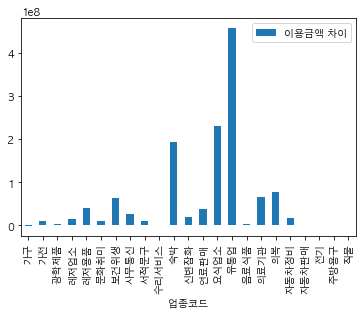

In [115]:
pd.DataFrame(main.groupby(['업종코드'])['이용금액 차이'].sum()).plot(kind = 'bar')

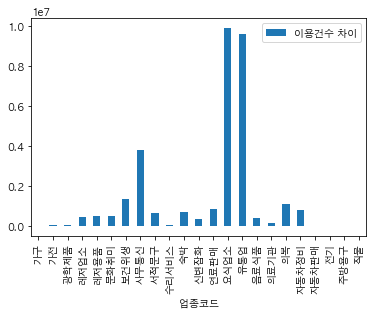

In [74]:
pd.DataFrame(main.groupby(['업종코드'])['이용건수 차이'].sum()).plot(kind = 'bar')

## 이용금액 차이 별 범주화 후 예측

In [254]:
rank =  main.groupby(['업종코드'])['이용금액 차이'].sum().tolist()
std = main.groupby(['업종코드'])['이용금액 차이'].sum().index.tolist()

In [255]:
rank

[-1092463.0,
 9389306.0,
 2569246.0,
 15680849.0,
 40760831.0,
 9635464.0,
 64139640.0,
 26779178.0,
 10350682.0,
 109897.0,
 193965996.0,
 19815447.0,
 38110436.0,
 229645153.0,
 456391760.0,
 3655864.0,
 64778151.0,
 76803511.0,
 17925430.0,
 1802404.0,
 -30889.0,
 1294666.0,
 1099786.0]

In [256]:
hehe = []
for i in rank:
    hehe.append([i,1])
rank = hehe
X,y = rank,std

In [257]:
rank

[[-1092463.0, 1],
 [9389306.0, 1],
 [2569246.0, 1],
 [15680849.0, 1],
 [40760831.0, 1],
 [9635464.0, 1],
 [64139640.0, 1],
 [26779178.0, 1],
 [10350682.0, 1],
 [109897.0, 1],
 [193965996.0, 1],
 [19815447.0, 1],
 [38110436.0, 1],
 [229645153.0, 1],
 [456391760.0, 1],
 [3655864.0, 1],
 [64778151.0, 1],
 [76803511.0, 1],
 [17925430.0, 1],
 [1802404.0, 1],
 [-30889.0, 1],
 [1294666.0, 1],
 [1099786.0, 1]]

In [258]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [259]:
cluster = dict(zip(std,kmeans.labels_))

In [218]:
main_amt = copy.copy(main)

In [219]:
cluster

{'가구': 3,
 '가전': 3,
 '광학제품': 3,
 '레저업소': 0,
 '레저용품': 0,
 '문화취미': 3,
 '보건위생': 4,
 '사무통신': 0,
 '서적문구': 3,
 '수리서비스': 3,
 '숙박': 2,
 '신변잡화': 0,
 '연료판매': 0,
 '요식업소': 2,
 '유통업': 1,
 '음료식품': 3,
 '의료기관': 4,
 '의복': 4,
 '자동차정비': 0,
 '자동차판매': 3,
 '전기': 3,
 '주방용구': 3,
 '직물': 3}

In [220]:
main_amt['업종코드'].replace(cluster,inplace = True)
main_amt.rename(columns={'업종코드':'cluster'},inplace = True)

##### main_amt

In [224]:
X,y = main_amt[['일자','confirmed','death','released','tested','negative','이용금액 차이','이용건수 차이']],main_amt['cluster']

In [225]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [227]:
from sklearn.linear_model import LogisticRegression
main_Logistic = LogisticRegression().fit(X_train,y_train)

/Users/jaeyoungcho/opt/anaconda3/envs/BigContest/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [228]:
main_Logistic.score(X_train,y_train)

0.5226654578422484

In [229]:
main_Logistic.score(X_test,y_test)

0.5362318840579711

In [235]:
from sklearn.tree import DecisionTreeClassifier
main_tree = DecisionTreeClassifier().fit(X_train,y_train)

In [239]:
main_tree.score(X_test,y_test)

0.7336956521739131

In [246]:
from sklearn.ensemble import RandomForestClassifier
main_Forest = RandomForestClassifier(n_estimators=10).fit(X_train,y_train)

In [247]:
main_Forest.score(X_train,y_train)

0.9823209428830463

In [248]:
main_Forest.score(X_test,y_test)

0.7010869565217391